In [1]:
import os
import random
import pandas as pd

# 生成数据集并标注

In [48]:
FILE_PATH = 'relative_API_data/'
FIFE_LIST = os.listdir(FILE_PATH)
print(len(FIFE_LIST))
SEN_PATH = 'cnn-text-classification-tf-master-1/sent_results/'
TITLE_PATH = 'cnn-text-classification-tf-master-1/title_results/'
senFList = os.listdir(SEN_PATH)
titleFList = os.listdir(TITLE_PATH)
print(len(senFList), len(titleFList))

105
105 105


In [22]:
def getData(fileName, pid):
    result = [0] * 4
    df = pd.read_csv(SEN_PATH+fileName+'_sentsp.csv')
    for index in range(0, df.shape[0]):
        if df.iloc[index]['Id'] == pid:
            result[int(df.iloc[index]['Label'])] += 1
    df = pd.read_csv(TITLE_PATH+fileName+'_titlep.csv')
    for index in range(0, df.shape[0]):
        if df.iloc[index]['Id'] == pid:
            result[3] = df.iloc[index]['Label']
    return result

从20个API中分别挑选10个post进行标注

In [49]:
Samples = {}
sIndex = random.sample(range(0, len(FIFE_LIST)), 20) #20
for index in sIndex:
    df = pd.read_csv(FILE_PATH+FIFE_LIST[index])
    print(FIFE_LIST[index])
    sampleIndex = random.sample(range(0, df.shape[0]), 10) #10
    for i in sampleIndex:
        pid = df.iloc[i]['Id']
        data = getData(FIFE_LIST[index][:-6], pid)
        Samples[pid] = data
        #Samples.append(df.iloc[i]['Id'])
print(len(Samples))

bing-maps_R.csv
google-adwords_R.csv
ilist_R.csv
aws-cloud9_R.csv
foursquare_R.csv
amazon-queue-service_R.csv
recurly_R.csv
facebook_R.csv
twilio_R.csv
amazon-sns_R.csv
yammer_R.csv
google-plus_R.csv
facebook-ads_R.csv
cartodb_R.csv
tumblr_R.csv
google-mirror_R.csv
rhapsody_R.csv
2checkout_R.csv
mailgun_R.csv
allegro_R.csv
200


In [50]:
Samples

{30104750: [3, 0, 1, 0.0],
 33167130: [3, 1, 0, 0.0],
 14074253: [3, 0, 0, 0.0],
 19897307: [6, 0, 4, 0.0],
 33435707: [0, 0, 1, 2.0],
 48171922: [3, 1, 0, 0.0],
 25063121: [2, 1, 0, 1.0],
 46809816: [4, 1, 1, 0.0],
 34390613: [3, 2, 0, 0.0],
 27029930: [3, 2, 0, 0.0],
 17358797: [0, 1, 0, 0.0],
 38184885: [4, 0, 1, 0.0],
 54570326: [7, 0, 0, 0.0],
 34701482: [0, 1, 0, 0.0],
 42363449: [5, 0, 1, 0.0],
 43628568: [6, 0, 0, 0.0],
 44415428: [5, 1, 0, 0.0],
 44393901: [4, 1, 1, 0.0],
 20747079: [4, 0, 0, 0.0],
 28376649: [8, 0, 2, 0.0],
 201791: [6, 0, 0, 0.0],
 2766005: [1, 0, 0, 0.0],
 14225568: [5, 0, 0, 0.0],
 14533082: [9, 2, 0, 0.0],
 25302798: [9, 0, 0, 0.0],
 6520744: [1, 0, 2, 0.0],
 15486: [6, 0, 1, 0.0],
 511315: [6, 0, 0, 0.0],
 23753192: [6, 0, 0, 0.0],
 2939627: [1, 0, 0, 0.0],
 52754220: [0, 1, 0, 1.0],
 49624348: [0, 0, 1, 0.0],
 49728438: [8, 0, 1, 0.0],
 49521240: [7, 1, 0, 0.0],
 54912138: [5, 1, 0, 0.0],
 53876846: [13, 1, 3, 0.0],
 47849926: [12, 0, 1, 0.0],
 49382510

写文件

In [25]:
Ids = []
Os = []
Hs = []
Es = []
Tl = []
for key in Samples:
    Ids.append(key)
    Os.append(Samples[key][0])
    Hs.append(Samples[key][1])
    Es.append(Samples[key][2])
    Tl.append(Samples[key][3])

In [26]:
df = pd.DataFrame({'Id': Ids, 'SOther': Os, 'SHowto': Hs, 'SError': Es, 'TitleLabel': Tl})
df.to_csv('Sen2Post_ds.csv', sep=',', index=False)

接下来进行人工标注，后经实践表明，改变数据格式为Sen2Post_ds1.csv更为合理

# ======================================
# 训练转换模型

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn import tree

In [3]:
df = pd.read_csv('Sen2Post_ds1.csv')
df

,Id,SOther,SHowto,SError,TitleO,TitleH,TitleE,PostLabel
0,40899937,1,1,0,1,0,0,1
1,42363783,1,0,0,1,0,0,0
2,33135230,4,1,0,1,0,0,1
3,36413965,3,0,1,1,0,0,2
4,41100642,1,1,0,1,0,0,1
5,6319487,4,0,0,1,0,0,0
6,44638028,3,0,0,1,0,0,0
7,33447287,1,1,0,1,0,0,1
8,29548679,3,1,1,1,0,0,2
9,33477369,0,0,1,1,0,0,2


In [4]:
X = []
Y = []
VC = ['SHowto', 'SError', 'TitleO', 'TitleH', 'TitleE']
X = df[VC].values
Y = df['PostLabel'].values

In [5]:
result = [0] * 4
cnt = 0
num = 100
for num in range(0, num):
    X_train_set, X_test_set ,y_train_set, y_test_set = train_test_split(X, Y, random_state = num, test_size= 1/10)
    model_dict = {'kNN': KNeighborsClassifier(n_neighbors=3),
              '逻辑回归': LogisticRegression(C=1e3),
              'SVM': SVC(C=1e3),
                'DT':tree.DecisionTreeClassifier(criterion="entropy")
              }
    for model_name, model in model_dict.items():
        this_model = model
        t = this_model.fit(X_train_set,y_train_set)
        acc = this_model.score(X_test_set,y_test_set)
        print(f'{model_name}模型的预测准确率:{acc*100}%')
        result[cnt%4] += acc
        cnt += 1
    print('----------------------------')
for i in range(0, 4):
    result[i] /= num
print(result)

kNN模型的预测准确率:100.0%
逻辑回归模型的预测准确率:100.0%
SVM模型的预测准确率:100.0%
DT模型的预测准确率:100.0%
----------------------------
kNN模型的预测准确率:100.0%
逻辑回归模型的预测准确率:100.0%
SVM模型的预测准确率:100.0%
DT模型的预测准确率:100.0%
----------------------------
kNN模型的预测准确率:100.0%
逻辑回归模型的预测准确率:100.0%
SVM模型的预测准确率:100.0%
DT模型的预测准确率:100.0%
----------------------------
kNN模型的预测准确率:95.0%
逻辑回归模型的预测准确率:95.0%
SVM模型的预测准确率:95.0%
DT模型的预测准确率:95.0%
----------------------------
kNN模型的预测准确率:100.0%
逻辑回归模型的预测准确率:100.0%
SVM模型的预测准确率:100.0%
DT模型的预测准确率:100.0%
----------------------------
kNN模型的预测准确率:100.0%
逻辑回归模型的预测准确率:100.0%
SVM模型的预测准确率:95.0%
DT模型的预测准确率:100.0%
----------------------------
kNN模型的预测准确率:100.0%
逻辑回归模型的预测准确率:100.0%


/home/nash/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nash/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/nash/.local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/nash/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nash/.local/lib/python

SVM模型的预测准确率:100.0%
DT模型的预测准确率:100.0%
----------------------------
kNN模型的预测准确率:95.0%
逻辑回归模型的预测准确率:95.0%
SVM模型的预测准确率:95.0%
DT模型的预测准确率:95.0%
----------------------------
kNN模型的预测准确率:100.0%
逻辑回归模型的预测准确率:100.0%
SVM模型的预测准确率:100.0%
DT模型的预测准确率:100.0%
----------------------------
kNN模型的预测准确率:100.0%
逻辑回归模型的预测准确率:100.0%
SVM模型的预测准确率:100.0%
DT模型的预测准确率:100.0%
----------------------------
kNN模型的预测准确率:100.0%
逻辑回归模型的预测准确率:100.0%
SVM模型的预测准确率:100.0%
DT模型的预测准确率:100.0%
----------------------------
kNN模型的预测准确率:100.0%
逻辑回归模型的预测准确率:100.0%
SVM模型的预测准确率:100.0%
DT模型的预测准确率:100.0%
----------------------------
kNN模型的预测准确率:100.0%
逻辑回归模型的预测准确率:100.0%
SVM模型的预测准确率:100.0%
DT模型的预测准确率:100.0%
----------------------------
kNN模型的预测准确率:95.0%
逻辑回归模型的预测准确率:95.0%
SVM模型的预测准确率:95.0%
DT模型的预测准确率:95.0%
----------------------------
kNN模型的预测准确率:100.0%
逻辑回归模型的预测准确率:100.0%
SVM模型的预测准确率:100.0%
DT模型的预测准确率:100.0%
----------------------------
kNN模型的预测准确率:100.0%
逻辑回归模型的预测准确率:100.0%
SVM模型的预测准确率:100.0%
DT模型的预测准确率:100.0%
--------------------------

/home/nash/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nash/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/nash/.local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/nash/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nash/.local/lib/python

kNN模型的预测准确率:100.0%
逻辑回归模型的预测准确率:100.0%
SVM模型的预测准确率:100.0%
DT模型的预测准确率:100.0%
----------------------------
kNN模型的预测准确率:100.0%
逻辑回归模型的预测准确率:100.0%
SVM模型的预测准确率:100.0%
DT模型的预测准确率:100.0%
----------------------------
kNN模型的预测准确率:100.0%
逻辑回归模型的预测准确率:100.0%
SVM模型的预测准确率:100.0%
DT模型的预测准确率:100.0%
----------------------------
kNN模型的预测准确率:100.0%
逻辑回归模型的预测准确率:100.0%
SVM模型的预测准确率:100.0%
DT模型的预测准确率:100.0%
----------------------------
kNN模型的预测准确率:100.0%
逻辑回归模型的预测准确率:100.0%
SVM模型的预测准确率:95.0%
DT模型的预测准确率:100.0%
----------------------------
kNN模型的预测准确率:95.0%
逻辑回归模型的预测准确率:95.0%
SVM模型的预测准确率:95.0%
DT模型的预测准确率:95.0%
----------------------------
kNN模型的预测准确率:100.0%
逻辑回归模型的预测准确率:100.0%
SVM模型的预测准确率:100.0%
DT模型的预测准确率:100.0%
----------------------------
kNN模型的预测准确率:100.0%
逻辑回归模型的预测准确率:100.0%
SVM模型的预测准确率:100.0%
DT模型的预测准确率:100.0%
----------------------------
kNN模型的预测准确率:100.0%
逻辑回归模型的预测准确率:100.0%
SVM模型的预测准确率:100.0%
DT模型的预测准确率:100.0%
----------------------------
kNN模型的预测准确率:95.0%
逻辑回归模型的预测准确率:95.0%
SVM模型的预测准确率:95.0%
DT模型的

/home/nash/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nash/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/nash/.local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/nash/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nash/.local/lib/python

kNN模型的预测准确率:95.0%
逻辑回归模型的预测准确率:95.0%
SVM模型的预测准确率:95.0%
DT模型的预测准确率:95.0%
----------------------------
kNN模型的预测准确率:100.0%
逻辑回归模型的预测准确率:100.0%
SVM模型的预测准确率:100.0%
DT模型的预测准确率:100.0%
----------------------------
kNN模型的预测准确率:100.0%
逻辑回归模型的预测准确率:100.0%
SVM模型的预测准确率:95.0%
DT模型的预测准确率:100.0%
----------------------------
kNN模型的预测准确率:95.0%
逻辑回归模型的预测准确率:95.0%
SVM模型的预测准确率:95.0%
DT模型的预测准确率:95.0%
----------------------------
kNN模型的预测准确率:100.0%
逻辑回归模型的预测准确率:100.0%
SVM模型的预测准确率:100.0%
DT模型的预测准确率:100.0%
----------------------------
kNN模型的预测准确率:100.0%
逻辑回归模型的预测准确率:100.0%
SVM模型的预测准确率:100.0%
DT模型的预测准确率:100.0%
----------------------------
kNN模型的预测准确率:100.0%
逻辑回归模型的预测准确率:100.0%
SVM模型的预测准确率:100.0%
DT模型的预测准确率:100.0%
----------------------------
kNN模型的预测准确率:100.0%
逻辑回归模型的预测准确率:100.0%
SVM模型的预测准确率:95.0%
DT模型的预测准确率:100.0%
----------------------------
kNN模型的预测准确率:100.0%
逻辑回归模型的预测准确率:100.0%
SVM模型的预测准确率:100.0%
DT模型的预测准确率:100.0%
----------------------------
kNN模型的预测准确率:95.0%
逻辑回归模型的预测准确率:95.0%
SVM模型的预测准确率:95.0%
DT模型的预测准确率

/home/nash/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nash/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/nash/.local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/nash/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nash/.local/lib/python

画训练过程图

In [6]:
a = []
for i in range(1, 20):
    a.append(i/20)
a

[0.05,
 0.1,
 0.15,
 0.2,
 0.25,
 0.3,
 0.35,
 0.4,
 0.45,
 0.5,
 0.55,
 0.6,
 0.65,
 0.7,
 0.75,
 0.8,
 0.85,
 0.9,
 0.95]

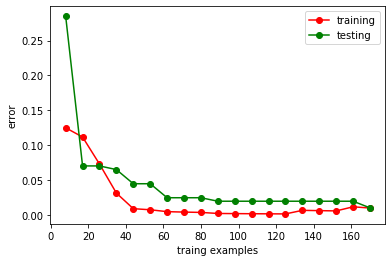

In [7]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
train_sizes, train_score, valid_scores = learning_curve(KNeighborsClassifier(n_neighbors=3), X, Y,train_sizes=a,cv=10,scoring='accuracy')
train_error =  1- np.mean(train_score,axis=1)
test_error = 1- np.mean(valid_scores,axis=1)
plt.plot(train_sizes,train_error,'o-',color = 'r',label = 'training')
plt.plot(train_sizes,test_error,'o-',color = 'g',label = 'testing')
plt.legend(loc='best')
plt.xlabel('traing examples')
plt.ylabel('error')
plt.show()

In [9]:
def test_n_neighbors(dataSet, labels):
    """
    使用不同的k值进行计算准确率
    :param dataSet 数据集
    :param labels 对应的标签
    :return:
    """
    # 用来保存平均准确率
    avg_scores = []
    # 全部的准确率
    all_scores = []
    # 设定k的值从1到20
    parameter_values = list(range(1, 21))
    # 对每个k值的准确率进行计算
    for n_neighbors in parameter_values:
        # 创建KNN分类器
        estimator = KNeighborsClassifier(n_neighbors=n_neighbors)
        scores = cross_val_score(estimator, dataSet, labels, scoring='accuracy')
        avg_scores.append(np.mean(scores))
        all_scores.append(scores)

    plt.plot(parameter_values, avg_scores, '-o')
    plt.show()

/home/nash/.local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/nash/.local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/nash/.local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/nash/.local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on t

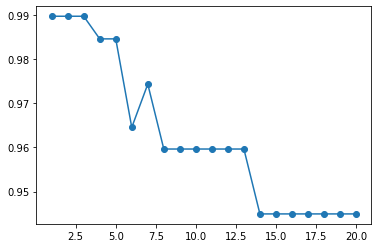

In [10]:
test_n_neighbors(X, Y)

对比测试四种模型

In [11]:
test = np.array([[1,1,1,0,0],[0,0,1,0,0],[10,0,0,0,1],[10,0,1,0,0],[1,6,0,1,0],[1,1,0,1,0],[1,2,0,1,0]])

In [12]:
for model_name, model in model_dict.items():
    this_model = model
    t = this_model.fit(X_train_set, y_train_set)
    print(f'{model_name}模型%')
    print(t.predict(test))

kNN模型%
[2 0 1 1 2 1 2]
逻辑回归模型%
[2 0 1 1 2 2 2]
SVM模型%
[2 0 2 2 2 2 2]
DT模型%
[2 0 1 1 2 2 2]


/home/nash/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nash/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/nash/.local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


## 进行句子和post之间分类结果的转换

In [13]:
save_path = 'API_class_csv/'
SEN_PATH = 'TextCNN/all_sent_results/'
TITLE_PATH = 'TextCNN/all_title_results/'
sen_list = os.listdir(SEN_PATH)
title_list = os.listdir(TITLE_PATH)
print(len(sen_list), len(title_list))

105 105


In [14]:
knn = KNeighborsClassifier(n_neighbors=3)
knn = knn.fit(X_train_set,y_train_set)
lr = LogisticRegression(C=1e3)
lr = lr.fit(X_train_set,y_train_set)
svm = SVC(C=1e3)
svm = svm.fit(X_train_set,y_train_set)
dt = tree.DecisionTreeClassifier(criterion="entropy")
dt = dt.fit(X_train_set,y_train_set)

/home/nash/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nash/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/nash/.local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [15]:
def get_last3(label):
    if label == 0:
        return [1, 0, 0]
    elif label == 1:
        return [0, 1, 0]
    else:
        return [0, 0, 1]

In [16]:
def cat(data):
    #print(data)
    result = []
    result.append(knn.predict(np.array([data]))[0])
    result.append(lr.predict(np.array([data]))[0])
    result.append(svm.predict(np.array([data]))[0])
    result.append(dt.predict(np.array([data]))[0])
    #print(result)
    counts = np.bincount(result)
    return np.argmax(counts)

In [17]:
def get_data(dft, dfs):
    ids = []
    cats = []
    starts = 0
    for index in range(0, dft.shape[0]): #dft.shape[0]
        ID = dft.iloc[index].Id
        ids.append(ID)
        title_data = get_last3(dft.iloc[index].Label)
        slabel = [0] * 2
        for i in range(starts, dfs.shape[0]):
            if dfs.iloc[i].Id == ID:
                if dfs.iloc[i].Label == 1:
                    slabel[0] += 1
                elif dfs.iloc[i].Label == 2:
                    slabel[1] += 1
                else:
                    pass
            else:
                starts = i
                break
        data = slabel + title_data
        cats.append(cat(data))
    return ids, cats

In [18]:
for file in title_list:
    api_name = file[:-11]
    print(api_name)
    dft = pd.read_csv(TITLE_PATH+file)
    dfs = pd.read_csv(SEN_PATH+api_name+'_sentsp.csv')
    id_list, cat_list = get_data(dft, dfs)
    print(dft.shape, len(id_list), len(cat_list))
    dfw = pd.DataFrame({'Id': id_list, 'Category': cat_list})
    dfw.to_csv(save_path+api_name+'_c.csv', index=False)

eventbrite
(272, 3) 272 272
linkedin
(2240, 3) 2240 2240
breadcrumbs
(1761, 3) 1761 1761
openstack
(2771, 3) 2771 2771
multimap
(1115, 3) 1115 1115
google-checkout
(592, 3) 592 592
coinbase
(384, 3) 384 384
geonames
(268, 3) 268 268
allegro
(537, 3) 537 537
deezer
(308, 3) 308 308
dropbox
(3261, 3) 3261 3261
google-cloud-print
(239, 3) 239 239
google-distance-matrix
(511, 3) 511 511
mailchimp
(2692, 3) 2692 2692
admob
(7714, 3) 7714 7714
amazon-ec2
(25922, 3) 25922 25922
opensocial
(176, 3) 176 176
dailymotion
(251, 3) 251 251
google-maps-android
(12780, 3) 12780 12780
buffer
(17136, 3) 17136 17136
youtube
(15890, 3) 15890 15890
reddit
(1153, 3) 1153 1153
digitalocean
(3833, 3) 3833 3833
recurly
(150, 3) 150 150
tumblr
(2700, 3) 2700 2700
ilist
(1398, 3) 1398 1398
google-maps
(80128, 3) 80128 80128
bing-maps
(2838, 3) 2838 2838
servicenow
(579, 3) 579 579
google-directions
(2108, 3) 2108 2108
xero
(237, 3) 237 237
brightcove
(254, 3) 254 254
twilio
(3200, 3) 3200 3200
rhapsody
(144, 3)

In [105]:
dfw = pd.read_csv(save_path+'2checkout_c.csv')
dfw

,Id,Category
0,1367488,0
1,1872621,0
2,5013558,1
3,8850942,0
4,9346284,1
5,11099424,0
6,11356745,0
7,12122599,0
8,12225622,0
9,12349278,0


In [93]:
dft

,Id,Title,Label
0,1367488,Redirecting back to your site after checking o...,0.0
1,1872621,2CO Dontate Button,0.0
2,5013558,How do I handle recurring/subscription billing...,0.0
3,8850942,Asp.Net Session Lost After Https,0.0
4,9346284,Securing returning querystrings from third-par...,0.0
5,11099424,How to set 2checkout payment timeout?,0.0
6,11356745,2Checkout & Wishlist Member plugin wordpress i...,0.0
7,12122599,"Drupal Ubercart 2checkout, what DIRECT RETURN ...",0.0
8,12225622,2Checkout sales - no records found(0 Sales),0.0
9,12349278,How to redirect to our URL after payment compl...,0.0


In [94]:
dfs

,Id,Sentence,Label
0,1367488,I've setup a drupal site before where I DID N...,0.0
1,1367488,"However, on another site, this is not happening.",0.0
2,1367488,What am I missing?,0.0
3,1367488,"I am using Drupal, with Uber Cart and the stan...",0.0
4,1872621,How can I make a 2CO donate button?,0.0
5,1872621,Thanks,0.0
6,5013558,"I can't use Chargify, Recurly, Spreedly or an...",0.0
7,5013558,"I am in Jamaica, actually...so many of these c...",0.0
8,5013558,But I am trying to roll a custom subscription ...,0.0
9,5013558,Are there any gems that can handle this?,1.0
